<img src = "UnderCompleteAutoEncoder.png">

## Un-Complete auto encoder to convert 3D data to 2D data

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
    
import seaborn as sns

np.random.seed(20000)

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#In auto encoders Input neurons = ouput neurons

n_inputs = 2 # 3D inputs
n_hidden = 2 # 2D codings
n_outputs = n_inputs

In [4]:
#Learning rate
learning_rate =0.01

In [5]:
## shape = [numberofSamples , dimension_of_each_sample]
## as number of samples are unknown so we passed numberOfSamples=None
X = tf.placeholder(tf.float32, shape=[None ,n_inputs])
hidden =  tf.layers.dense(X,n_hidden)
output = tf.layers.dense(hidden,n_outputs)

reconstruction_loss = tf.reduce_mean(tf.square(output-X)) #MSE
optimizer =  tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)
init = tf.global_variables_initializer()

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [6]:
## Training The Neural Network.
# import pandas as pd
# df = pd.read_csv("MOCK_DATA.csv")
arr = np.array([[random.random(),random.random()]  for i in range(0,2500)])
X_train, X_test = train_test_split(arr, test_size=0.33, random_state=42)           

In [7]:
n_iterations = 1000 
codings = hidden # the o/p of hidden layer provides the codings 
X_train.transpose()
with tf.Session() as sess:
    init.run()
    for iteration in range(0,n_iterations):
        training_op.run(feed_dict={X:X_train}) #No lables unsupervised
    codings_val = codings.eval(feed_dict={X:X_test})

In [8]:
df = pd.DataFrame(X_train)
df.columns = ['X','Y']

In [10]:
op = pd.DataFrame(codings_val)
op.columns = ['X','Y']

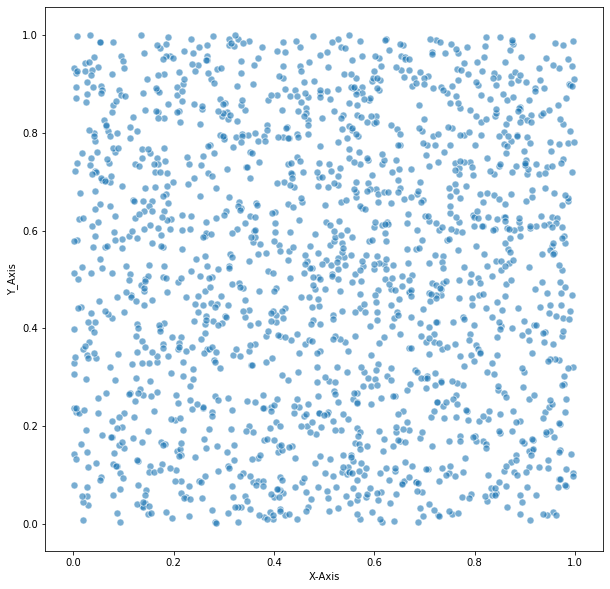

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

xs = df['X']
ys = df['Y']
# zs = df['Z']
ax.scatter(xs, ys, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('X-Axis')
ax.set_ylabel('Y_Axis')

plt.show()

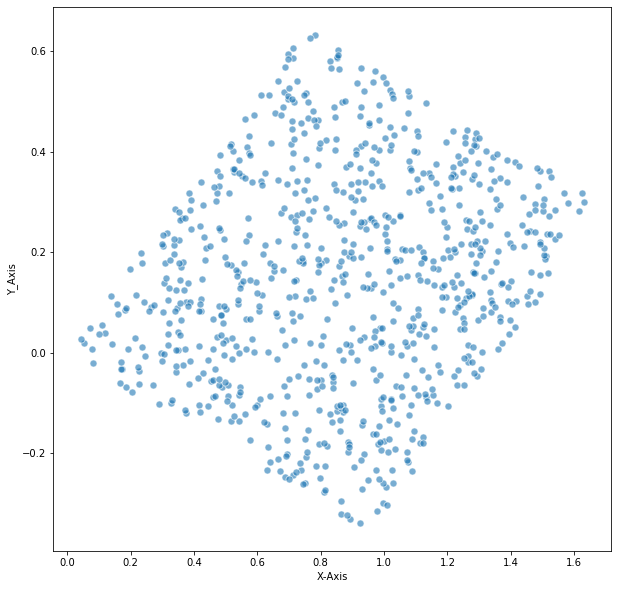

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

xs =op['X']
ys = op['Y']
# zs = df['Z']
ax.scatter(xs, ys, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('X-Axis')
ax.set_ylabel('Y_Axis')
# ax.set_zlabel('Z-Axis')

plt.show()